# Pre- Trained DETR 불러오기

In [1]:
import torch
import requests
from PIL import Image
from transformers import DetrForObjectDetection, DetrImageProcessor

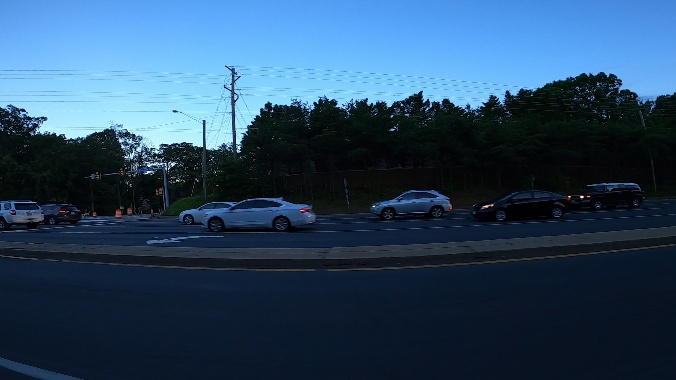

In [2]:
# 이미지 로드
image_path = '/kaggle/input/car-object-detection/data/training_images/vid_4_26460.jpg'
image = Image.open(image_path)
image

In [3]:
# 모델 및 프로세서 로드
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
# 이미지를 모델에 맞게 전처리
inputs = processor(images=image, return_tensors="pt")

# 예측 수행
outputs = model(**inputs)

# 결과 얻기
logits = outputs.logits  # 예측된 클래스
boxes = outputs.pred_boxes  # 예측된 바운딩 박스

In [5]:
outputs

DetrObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[-15.6936,   0.7422,  -2.6015,  ..., -11.3806,  -6.6593,   8.6495],
         [-14.8716,   0.9472,  -2.9099,  ...,  -9.1850,  -5.7110,   8.9549],
         [-15.2273,   1.3511,  -2.3875,  ...,  -9.3822,  -7.7194,   8.6690],
         ...,
         [-17.3377,   1.8236,  -3.7983,  ...,  -9.7324,  -6.9555,   9.3762],
         [-10.6191,   1.3297,  -0.5449,  ..., -10.1761,  -6.8800,   5.1940],
         [-17.2783,   1.0430,  -4.1702,  ...,  -9.7698,  -6.8322,   9.5255]]],
       grad_fn=<ViewBackward0>), pred_boxes=tensor([[[0.0475, 0.5533, 0.0281, 0.0379],
         [0.3299, 0.5326, 0.0341, 0.0209],
         [0.1692, 0.5608, 0.0131, 0.0224],
         [0.5139, 0.5141, 0.0123, 0.0450],
         [0.2382, 0.4816, 0.0115, 0.0413],
         [0.3705, 0.5662, 0.1933, 0.0860],
         [0.3351, 0.5381, 0.0314, 0.0193],
         [0.1984, 0.5534, 0.0112, 0.0283],
         [0.1783, 0.4572, 0.0081, 0.0242],
         [0.1688, 0.4606, 0.007

In [6]:
# 예측된 클래스와 바운딩 박스 보기
probas = logits.softmax(-1)[0, :, :-1]
keep = probas.max(-1).values > 0.9  # 신뢰도 높은 예측만 선택

print(f"Class prediction: {probas}")
print(f"Selected boxes: {keep}")

Class prediction: tensor([[2.6598e-11, 3.6546e-04, 1.2902e-05,  ..., 1.0922e-07, 1.9859e-09,
         2.2304e-07],
        [4.3954e-11, 3.2584e-04, 6.8843e-06,  ..., 2.6330e-07, 1.2961e-08,
         4.1819e-07],
        [4.0476e-11, 6.4135e-04, 1.5256e-05,  ..., 5.7098e-07, 1.3986e-08,
         7.3763e-08],
        ...,
        [2.4985e-12, 5.2394e-04, 1.8955e-06,  ..., 1.8092e-07, 5.0187e-09,
         8.0643e-08],
        [2.4093e-10, 3.7257e-05, 5.7156e-06,  ..., 6.7622e-07, 3.7524e-10,
         1.0134e-08],
        [2.2849e-12, 2.0687e-04, 1.1262e-06,  ..., 1.0735e-07, 4.1665e-09,
         7.8624e-08]], grad_fn=<SliceBackward0>)
Selected boxes: tensor([False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, Fal

In [8]:
# 결과 출력
for p, (cx, cy, w, h) in zip(probas[keep], boxes[0][keep]):
    print(f"Class: {p.argmax()}, Confidence: {p.max():.4f}, Bbox: [{cx:.2f}, {cy:.2f}, {w:.2f}, {h:.2f}]")

Class: 3, Confidence: 0.9885, Bbox: [0.90, 0.52, 0.12, 0.08]
Class: 3, Confidence: 0.9798, Bbox: [0.31, 0.57, 0.09, 0.07]
Class: 3, Confidence: 0.9904, Bbox: [0.03, 0.57, 0.06, 0.08]
Class: 3, Confidence: 0.9950, Bbox: [0.09, 0.57, 0.07, 0.06]
Class: 3, Confidence: 0.9972, Bbox: [0.38, 0.57, 0.18, 0.09]
Class: 3, Confidence: 0.9986, Bbox: [0.61, 0.54, 0.12, 0.08]
Class: 3, Confidence: 0.9977, Bbox: [0.77, 0.54, 0.15, 0.09]


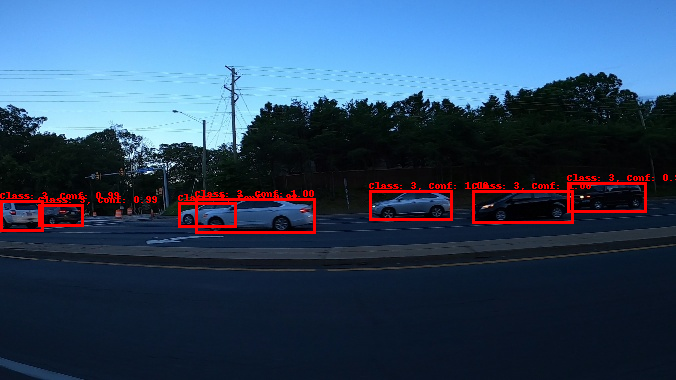

In [9]:
from PIL import ImageDraw

def draw_bounding_boxes(image, boxes, labels, confidences, threshold=0.9):
    draw = ImageDraw.Draw(image)
    
    for box, label, confidence in zip(boxes, labels, confidences):
        if confidence > threshold:
            # xywh -> xmin, ymin, xmax, ymax 변환
            x_center, y_center, width, height = box
            xmin = (x_center - width / 2) * image.width
            ymin = (y_center - height / 2) * image.height
            xmax = (x_center + width / 2) * image.width
            ymax = (y_center + height / 2) * image.height
            
            # 좌표가 유효한지 확인 (xmin < xmax, ymin < ymax)
            if xmin < xmax and ymin < ymax:
                # 바운딩 박스 그리기
                draw.rectangle([(xmin, ymin), (xmax, ymax)], outline="red", width=3)
                
                # 클래스 및 신뢰도 그리기
                text = f"Class: {label}, Conf: {confidence:.2f}"
                draw.text((xmin, ymin - 10), text, fill="red")

    return image

draw_bounding_boxes(image, boxes[0][keep], probas.argmax(-1)[keep], probas.max(-1).values[keep])

# Torch-hub에서 DETR 불러오기

In [10]:
# DETR 모델 불러오기 (ResNet-50 백본 사용)
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval()  # 평가 모드로 설정

Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /root/.cache/torch/hub/main.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 185MB/s] 
Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cach

DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, ou

In [11]:
from torchvision import transforms

# 이미지 전처리: DETR에 맞는 크기로 변환하고 텐서로 변환
transform = transforms.Compose([
    transforms.Resize(800),  # 이미지 크기를 800으로 조정
    transforms.ToTensor(),  # 이미지를 텐서로 변환
])

image_tensor = transform(image).unsqueeze(0)

In [12]:
# 예측 수행
outputs = model(image_tensor)

# 예측 결과 중 클래스 확률 및 바운딩 박스 추출
logits = outputs['pred_logits']  # 클래스 예측 결과
boxes = outputs['pred_boxes']  # 바운딩 박스 예측 결과

In [13]:
print(f"Class prediction: {logits.softmax(-1)}")
print(f"Selected boxes: {boxes}")

Class prediction: tensor([[[1.5566e-11, 9.5331e-04, 2.3166e-07,  ..., 3.1845e-10,
          3.1390e-08, 9.8122e-01],
         [1.8104e-12, 1.5269e-03, 3.4521e-07,  ..., 6.7118e-11,
          7.9828e-08, 9.9787e-01],
         [4.7198e-12, 2.2971e-05, 1.2392e-07,  ..., 8.6998e-11,
          1.4710e-08, 9.8177e-01],
         ...,
         [2.1442e-12, 8.1164e-06, 2.0200e-08,  ..., 1.6651e-10,
          3.2594e-09, 9.8705e-01],
         [1.8465e-11, 2.5777e-05, 1.3747e-07,  ..., 2.6257e-10,
          8.7164e-09, 8.3567e-01],
         [2.9401e-12, 1.1429e-03, 4.6996e-07,  ..., 1.3549e-10,
          5.3679e-08, 9.9623e-01]]], grad_fn=<SoftmaxBackward0>)
Selected boxes: tensor([[[0.0313, 0.5859, 0.0601, 0.0694],
         [0.5895, 0.5602, 0.0334, 0.0309],
         [0.0619, 0.5794, 0.1234, 0.1102],
         [0.6131, 0.5522, 0.1354, 0.0865],
         [0.3659, 0.5721, 0.2077, 0.1380],
         [0.4594, 0.5783, 0.4176, 0.1162],
         [0.3691, 0.5804, 0.1912, 0.0883],
         [0.2056, 0.5519, 0

In [14]:
# 클래스 예측 확률을 소프트맥스 함수로 변환
probas = logits.softmax(-1)[0, :, :-1]  # 마지막 클래스는 'no object'이므로 제외
keep = probas.max(-1).values > 0.9  # 신뢰도 90% 이상인 예측만 선택

# 선택된 바운딩 박스 및 클래스
pred_boxes = boxes[0, keep]  # 신뢰도가 높은 바운딩 박스들
pred_labels = probas[keep].argmax(-1)  # 예측된 클래스들
pred_probs = probas[keep].max(-1).values.tolist()  # Class 확률 최댓값

In [15]:
print(pred_boxes, pred_labels)

tensor([[0.3633, 0.5804, 0.1994, 0.0975],
        [0.0589, 0.5782, 0.1170, 0.0851],
        [0.6083, 0.5577, 0.1153, 0.0686]], grad_fn=<IndexBackward0>) tensor([6, 6, 3])


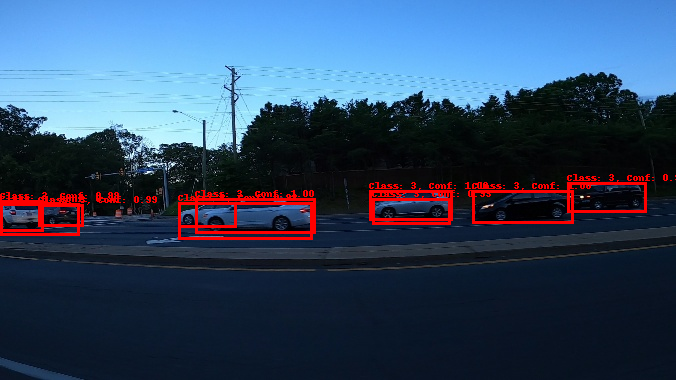

In [16]:
image_with_boxes = draw_bounding_boxes(image, pred_boxes, pred_labels, pred_probs)
image_with_boxes